In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [24]:
df=pd.read_csv("C:\\Users\\dell\\Desktop\\Machine Learning\\Naive_Bayes\\Social_Network_Ads.csv")

In [25]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
df['EstimatedSalary'].value_counts()

72000     12
80000     11
79000     10
71000      9
75000      9
59000      8
74000      7
55000      7
88000      7
43000      7
60000      7
23000      7
61000      6
33000      6
50000      6
52000      6
65000      6
28000      6
82000      6
89000      6
57000      6
58000      5
20000      5
32000      5
22000      5
42000      5
86000      5
90000      5
47000      5
26000      4
          ..
131000     2
141000     2
19000      2
99000      1
105000     1
126000     1
147000     1
120000     1
93000      1
123000     1
48000      1
148000     1
106000     1
101000     1
91000      1
115000     1
139000     1
129000     1
97000      1
46000      1
119000     1
95000      1
116000     1
69000      1
102000     1
142000     1
100000     1
37000      1
114000     1
64000      1
Name: EstimatedSalary, Length: 117, dtype: int64

In [29]:
x=df.drop(['User ID','Purchased'],axis=1)
y=df['Purchased']

In [30]:
x=pd.concat([x,pd.get_dummies(x['Gender'],drop_first=True)],axis=1)

In [31]:
x.head()

,Gender,Age,EstimatedSalary,Male
0,Male,19,19000,1
1,Male,35,20000,1
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,1


In [32]:
x.drop(['Gender'],inplace=True,axis=1)

In [33]:
x.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [34]:
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
model=ExtraTreesClassifier()

In [36]:
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
print(model.feature_importances_)

[0.49613651 0.49969903 0.00416445]


In [38]:
feat_impo=pd.Series(model.feature_importances_,index=x.columns)

In [39]:
feat_impo.head()

Age                0.496137
EstimatedSalary    0.499699
Male               0.004164
dtype: float64

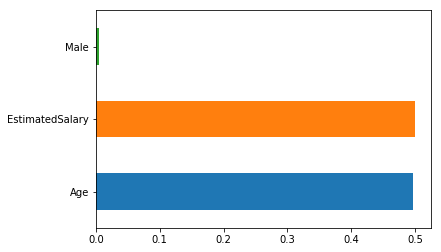

In [40]:
feat_impo.plot(kind='barh')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
model=GaussianNB().fit(x_train,y_train)

In [45]:
pred=model.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
print(confusion_matrix(y_test,pred))

[[50  2]
 [ 3 25]]


In [49]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95        52
          1       0.93      0.89      0.91        28

avg / total       0.94      0.94      0.94        80

